# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API keypip install citipy
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 598


In [3]:
cities


['anadyr',
 'bethel',
 'puerto natales',
 'igrim',
 'hamilton',
 'makokou',
 'iqaluit',
 'klyuchi',
 'yingkou',
 'pangody',
 'blackmans bay',
 'waitangi',
 'adamstown',
 'xinyuan',
 'tiksi',
 'chidawa',
 'inekar',
 'taiohae',
 'badger',
 'mugia',
 'saint-pierre',
 'jayapura',
 'longyearbyen',
 'nemuro',
 'aginskoye',
 'vorgashor',
 'lebu',
 'sosnovo-ozerskoye',
 'dan sadau',
 'kidal',
 'afaahiti',
 'enewetak',
 'port elizabeth',
 'castanos',
 'san patricio',
 'jamestown',
 'grytviken',
 'port-aux-francais',
 'albany',
 'asosa',
 'yellowknife',
 'buka',
 'al ghayzah',
 'papao',
 'jau',
 'gornozavodsk',
 'chabahar',
 'hermanus',
 'roma',
 'pathein',
 'petropavlovsk-kamchatsky',
 'cartagena',
 'kodiak',
 'cabo san lucas',
 'nangis',
 'tolanaro',
 'west island',
 'edinburgh of the seven seas',
 'novouzensk',
 'kulia village',
 'murygino',
 'coari',
 'alotau',
 'margaret river',
 'utrik',
 'papatowai',
 'isafjordur',
 'ushuaia',
 'puerto ayora',
 'buala',
 'wailua homesteads',
 'huarmey',
 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | igrim
Processing Record 5 of Set 1 | hamilton
Processing Record 6 of Set 1 | makokou
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | klyuchi
Processing Record 9 of Set 1 | yingkou
Processing Record 10 of Set 1 | pangody
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | xinyuan
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | chidawa
Processing Record 17 of Set 1 | inekar
City not found. Skipping...
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | badger
Processing Record 20 of Set 1 | mugia
Processing Record 21 of Set 1 | saint-pierre
Processing Record 22 of Set 1 | jayapura


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [6]:
# Display sample data
city_data_df.head(50)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,1.90,85,75,2.24,RU,1710351943
1,bethel,41.3712,-73.4140,68.36,39,0,6.91,US,1710351944
2,puerto natales,-51.7236,-72.4875,52.25,58,75,21.85,CL,1710351944
3,igrim,63.1906,64.4162,6.37,92,99,4.85,RU,1710351944
4,hamilton,39.1834,-84.5333,72.61,45,0,11.50,US,1710351835
5,makokou,0.5738,12.8642,70.29,96,94,2.95,GA,1710351945
6,iqaluit,63.7506,-68.5145,-4.27,71,75,2.30,CA,1710351945
7,klyuchi,52.2667,79.1667,17.22,89,88,9.06,RU,1710351945
8,yingkou,40.6648,122.2283,35.91,61,0,5.84,CN,1710351946
9,pangody,65.8500,74.4859,-5.06,99,100,8.05,RU,1710351946


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,1.90,85,75,2.24,RU,1710351943
1,bethel,41.3712,-73.4140,68.36,39,0,6.91,US,1710351944
2,puerto natales,-51.7236,-72.4875,52.25,58,75,21.85,CL,1710351944
3,igrim,63.1906,64.4162,6.37,92,99,4.85,RU,1710351944
4,hamilton,39.1834,-84.5333,72.61,45,0,11.50,US,1710351835


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

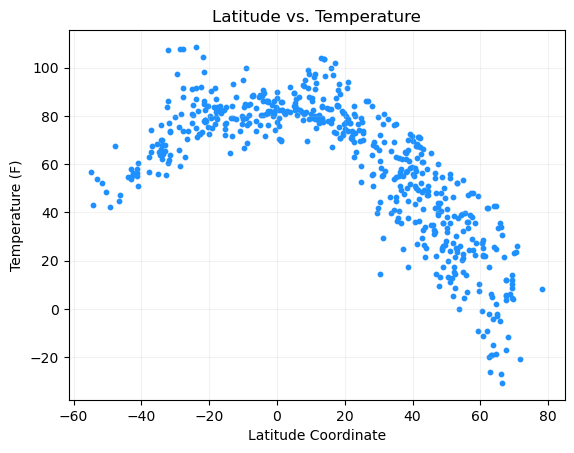

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],s = 10, color = "dodgerblue")
plt.grid(axis = "both", alpha = .1)

plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude Coordinate")
plt.ylabel("Temperature (F)")
plt.grid(True,alpha = .2, color = "silver")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

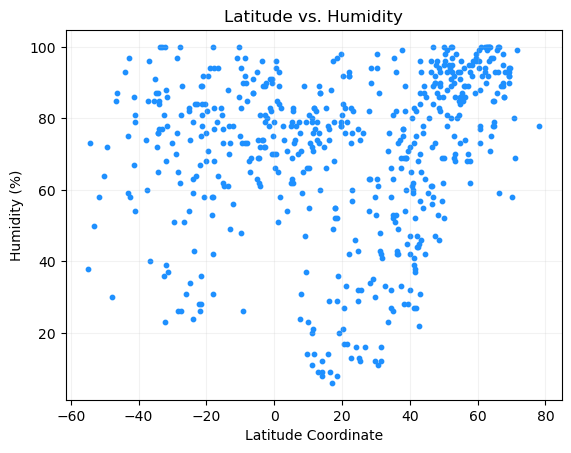

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],s = 10, color = "dodgerblue")
plt.grid(axis = "both", alpha = .1)

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude Coordinate")
plt.ylabel("Humidity (%)")
plt.grid(True,alpha = .2, color = "silver")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

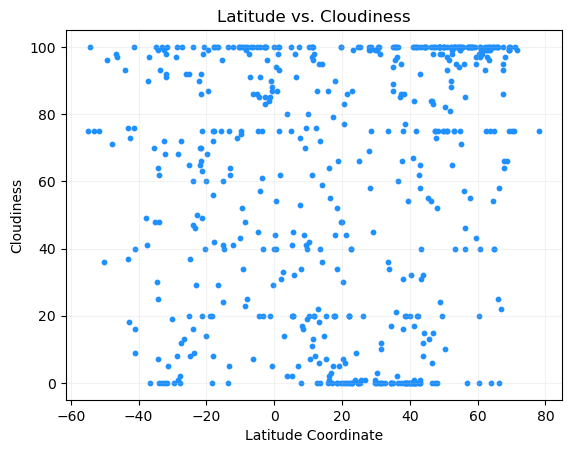

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],s = 10, color = "dodgerblue")
plt.grid(axis = "both", alpha = .1)

plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude Coordinate")
plt.ylabel("Cloudiness")
plt.grid(True,alpha = .2, color = "silver")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

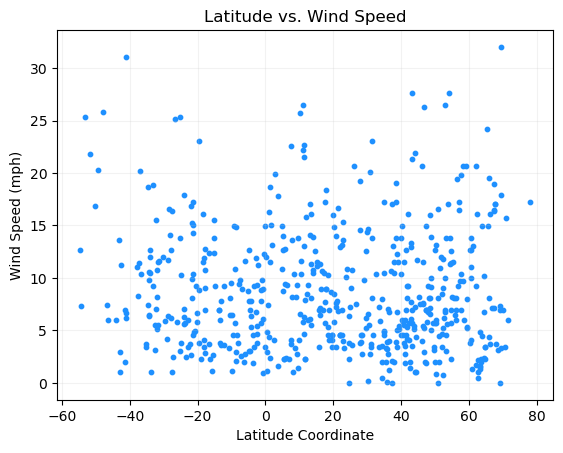

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Wind Speed"],s = 10, color = "dodgerblue")
plt.grid(axis = "both", alpha = .1)

plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude Coordinate")
plt.ylabel("Wind Speed (mph)")
plt.grid(True,alpha = .2, color = "silver")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values, color = "dodgerblue", s = 10)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=20,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,1.90,85,75,2.24,RU,1710351943
1,bethel,41.3712,-73.4140,68.36,39,0,6.91,US,1710351944
3,igrim,63.1906,64.4162,6.37,92,99,4.85,RU,1710351944
4,hamilton,39.1834,-84.5333,72.61,45,0,11.50,US,1710351835
5,makokou,0.5738,12.8642,70.29,96,94,2.95,GA,1710351945


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto natales,-51.7236,-72.4875,52.25,58,75,21.85,CL,1710351944
10,blackmans bay,-43.0167,147.3167,53.73,75,37,1.01,AU,1710351946
11,waitangi,-43.9535,-176.5597,54.82,93,93,5.99,NZ,1710351947
12,adamstown,-25.0660,-130.1015,77.25,82,92,13.80,PN,1710351947
18,saint-pierre,-21.3393,55.4781,78.48,78,20,10.36,RE,1710351949


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7515712505032984


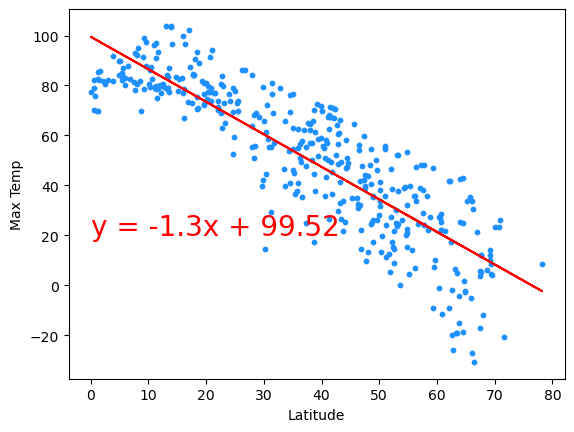

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(0,20))

The r-value is: 0.3990977323780362


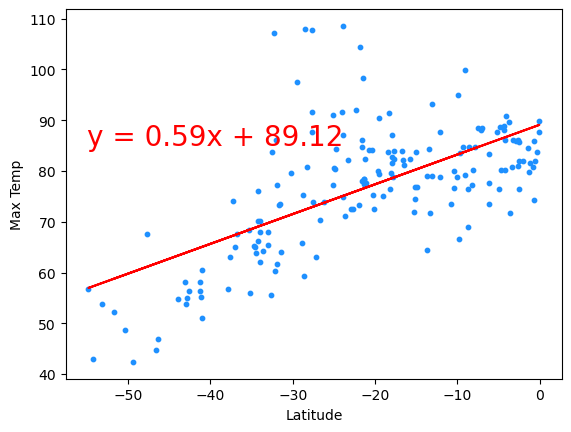

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 85))

**Discussion about the linear relationship:** This graph illustrates a negative regression between latitude and maximum temperature. The negative r value indicates a negative correlation between the variables. As cities move further north, the maximum temperature decreases.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15994083750910137


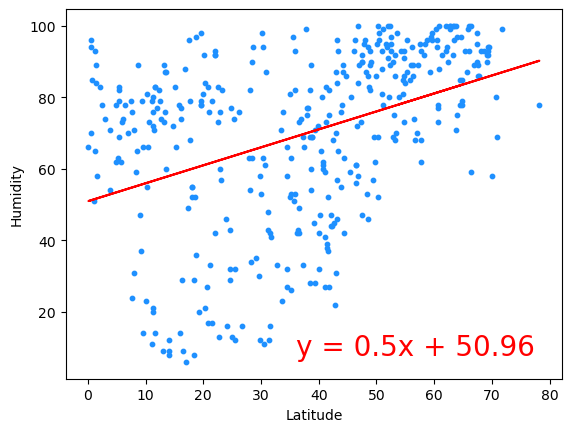

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(36,8))

The r-value is: 0.031095669274381108


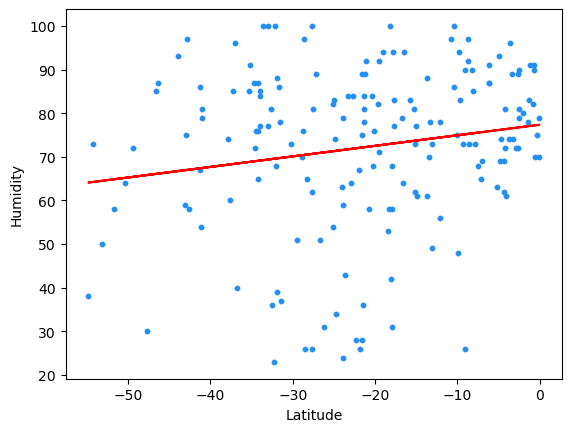

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-57, 17))

**Discussion about the linear relationship:** The correlation between humidity and latitude for cities appears to be weak. There is no clear relationship between latitude and humidity. Both graphs depict cities scattered without any trends in the scatter plots, suggesting its random.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11420928289474361


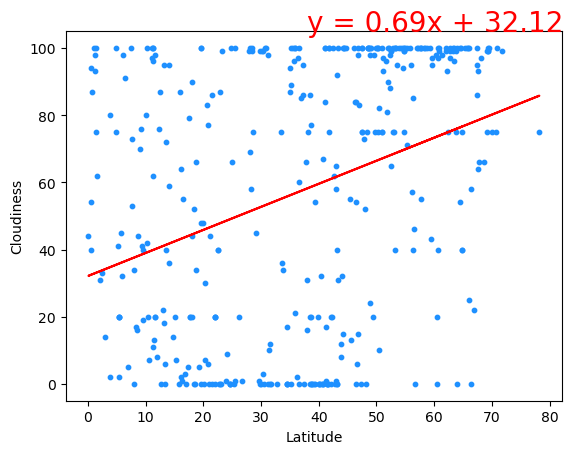

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (38,105))

The r-value is: 0.013382223205213758


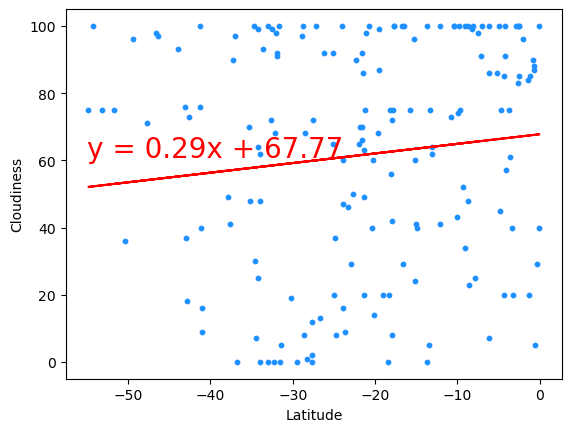

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55,61))

**Discussion about the linear relationship:** The correlation between cloudiness and latitude for cities is weak, similar to the correlation observed between humidity and latitude. There is no apparent relationship between latitude and cloudiness; cities are randomly distributed across both graphs.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 9.852394270050515e-05


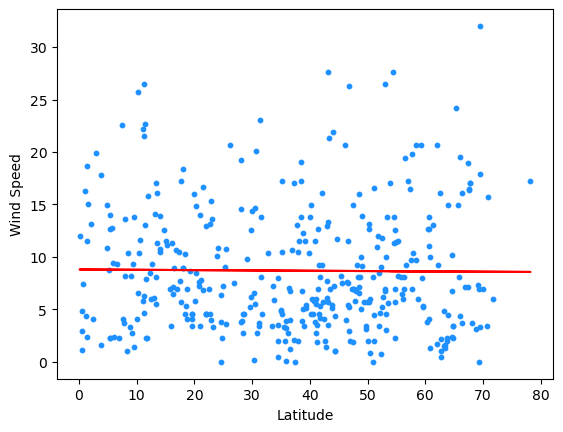

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,35))

The r-value is: 0.09070313300246557


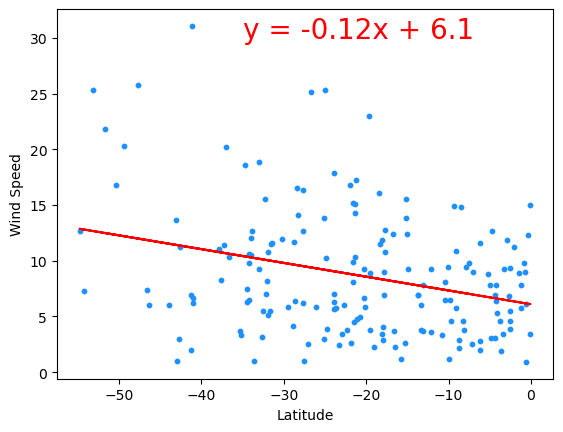

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-35, 30))

**Discussion about the linear relationship:** The correlation between wind speed and latitude appears weak. As observed in the regressions involving humidity and cloudiness, both graphs suggest a slight relationship between the variables, but it is unlikely due to the seemingly randomized plot of data.